In [1]:
!pip install category_encoders
!pip install sklearn

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce

In [3]:
train = pd.read_csv('train.csv')

# EDA + Feature Engineering

Сделаем признаки Group (вычленим группу из PassangerId) и разобъём признак Cabin на составляющие 

In [4]:
train['Group'] = train.PassengerId.str.split("_").str[0]
train['Deck'] = train.Cabin.str.split("/").str[0]
train['Num'] = train.Cabin.str.split("/").str[1]
train['Side'] = train.Cabin.str.split("/").str[2]


train.head()

,Unnamed: 0,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Deck,Num,Side
0,0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,B,0,P
1,1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,F,0,S
2,2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,A,0,S
3,3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,A,0,S
4,4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,F,1,S


...и удалим ненужные признаки.

In [5]:
train = train.drop(columns="PassengerId")
train = train.drop(columns="Cabin")

## Encode'им категориальные признаки

Сначала посмотрим на Home.

<Axes: >

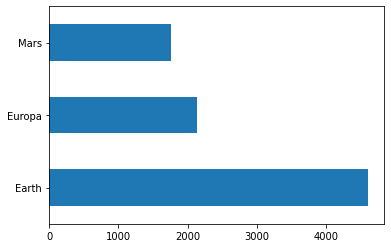

In [6]:
train.HomePlanet.value_counts().plot.barh()

Для кодирования используем count encoder

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  warnings.warn(


<Axes: >

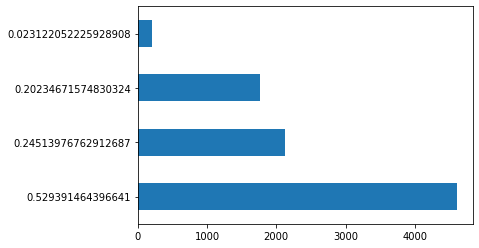

In [7]:
count_encoder = ce.CountEncoder(normalize=True)
train["HomePlanet"] = count_encoder.fit_transform(train['HomePlanet'], train['Transported'])

train["HomePlanet"].value_counts().plot.barh()


Теперь разберемся с Transported. Закодируем его Label Encoder'ом - благо в нем и так bool значения.

<Axes: >

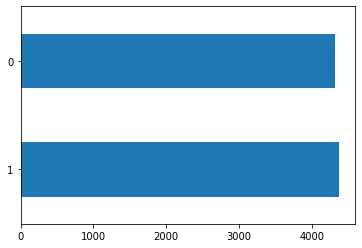

In [8]:
label_encoder = LabelEncoder()

train["Transported"] = label_encoder.fit_transform(train['Transported'])


train["Transported"].value_counts().plot.barh()

Теперь разберемся с VIP. Тут тоже поможет LabelEncoder.

<Axes: >

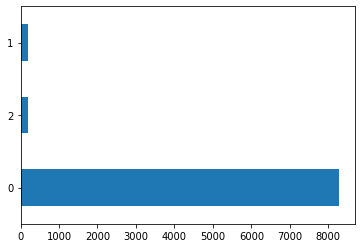

In [9]:
label_encoder = LabelEncoder()

train["VIP"] = label_encoder.fit_transform(train['VIP'])

train["VIP"].value_counts().plot.barh()

Теперь разбираемся с Deck, Side и Destination - тут снова Count Encoder.

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  warnings.warn(


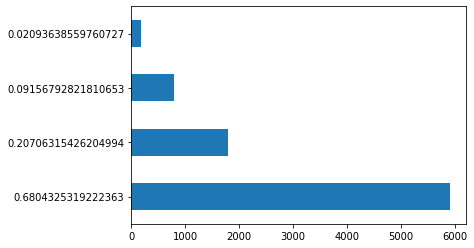

In [10]:
train["Deck"] = count_encoder.fit_transform(train['Deck'], train["Transported"])


train["Side"] = count_encoder.fit_transform(train['Side'], train["Transported"])
train["Destination"] = count_encoder.fit_transform(train['Destination'], train["Transported"])

train["Destination"].value_counts().plot.barh()
train = train.drop('Name', axis=1)

<Axes: >

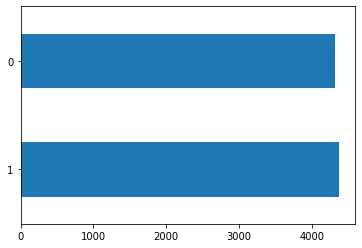

In [11]:
train["CryoSleep"] = label_encoder.fit_transform(train['Transported'])


train["CryoSleep"].value_counts().plot.barh()

In [12]:
train = train.fillna(train.mean())

/tmp/ipykernel_2462/1305261938.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train = train.fillna(train.mean())


In [13]:
train.to_csv('train.csv')